In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class FiveLink:
    def __init__(self, l0, l1, l2):
        self.w = l0/2
        self.l1 = l1
        self.l2 = l2
        
    def fk(self, th1s, th2s):
        th1s = th1s.reshape(1, -1)
        th2s = th2s.reshape(1, -1)
        j1 = np.concatenate([self.l1*np.cos(th1s) - self.w, 
                                              self.l1*np.sin(th1s)])
        j2 = np.concatenate([self.l1*np.cos(np.pi - th2s) + self.w, 
                                              self.l1*np.sin(np.pi - th2s)])
        mask = (j1[0] <= j2[0])
        j1 = j1[:, mask]
        j2 = j2[:, mask]
        #print(j1.shape)
        m = (j1 + j2)/2
        v = j2 - j1
        v_norm = np.linalg.norm(v, axis=0)
        on = v[[1, 0]]*np.array([[-1],[ 1]])/v_norm
        l = self.l2**2 - (v_norm/2)**2
        mask = (l >= 0)
        l = np.sqrt(l[mask])
        p = m[:, mask] + l*on[:, mask]
        return p

In [99]:
model = FiveLink(60, 100, 100)

In [100]:
th1s = np.array(range(0, 185, 5))*np.pi/180
th1s = np.repeat(th1s.reshape(1, -1), 36, axis=0).flatten()
th2s = np.array(range(0, 185, 5))*np.pi/180
th2s = np.repeat(th2s, 36)
print(th1s)
print(th2s)

[0.         0.08726646 0.17453293 ... 2.96705973 3.05432619 3.14159265]
[0.         0.         0.         ... 3.14159265 3.14159265 3.14159265]


In [101]:
p = model.fk(th1s, th2s)
p.shape

(2, 775)

In [102]:
x, y = p

In [103]:
x.shape

(775,)

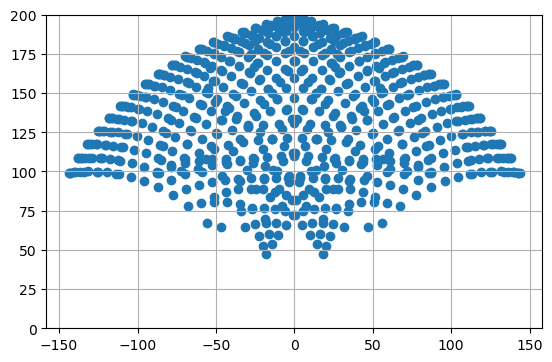

In [104]:
x, y = p
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.set_ylim(0, 200)
ax.grid()
ax.scatter(x, y)
plt.show()

In [171]:
class FourLink:
    def __init__(self, l1, l2, l3):
        self.l1 = l1
        self.l2 = l2
        self.l3 = l3
        
    def fk(self, th1s, th2s):
        th1s = th1s.reshape(1, -1)
        th2s = th2s.reshape(1, -1)
        e1 = np.concatenate([np.cos(th1s),
                                               np.sin(th1s)])
        e2 = np.concatenate([-np.cos(th2s), 
                                               np.sin(th2s)])
        j1 = self.l1*e1
        j2 = self.l2*e2
        p = self.l1*e1 - self.l3*e2
        mask = (j1[0] >= j2[0])
        p = p[:, mask]
        return p

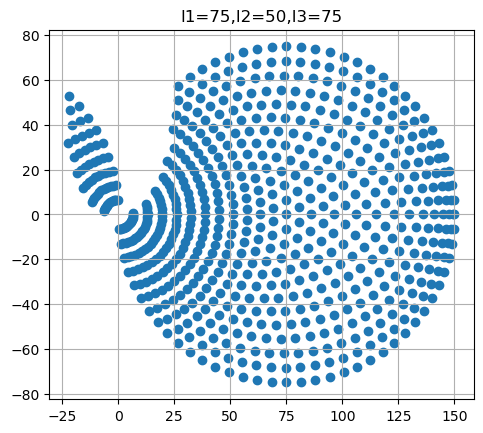

In [254]:
model2 = FourLink(75, 50, 75) #120, 80

th1s = np.array(range(0, 185, 5))*np.pi/180
th1s = np.repeat(th1s.reshape(1, -1), 36, axis=0).flatten()
th2s = np.array(range(0, 185, 5))*np.pi/180
th2s = np.repeat(th2s, 36)

ps = model2.fk(th1s, th2s)
ps.shape

xs, ys = ps
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect="equal")
#ax.set_ylim(0, 200)
ax.grid()
ax.scatter(xs, ys)
ax.set_title(f'l1={model2.l1},l2={model2.l2},l3={model2.l3}')
plt.show()

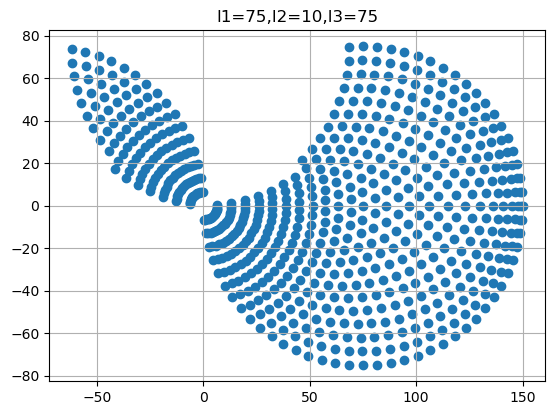

In [256]:
model3 = FourLink(75, 10, 75) #120, 80

th1s = np.array(range(0, 185, 5))*np.pi/180
th1s = np.repeat(th1s.reshape(1, -1), 36, axis=0).flatten()
th2s = np.array(range(0, 185, 5))*np.pi/180
th2s = np.repeat(th2s, 36)

ps = model3.fk(th1s, th2s)
ps.shape

xs, ys = ps
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect="equal")
#ax.set_ylim(0, 200)
ax.grid()
ax.scatter(xs, ys)
ax.set_title(f'l1={model3.l1},l2={model3.l2},l3={model3.l3}')
plt.show()

In [231]:
np.linalg.norm(a, axis=0)

NameError: name 'a' is not defined

In [6]:
np.linalg.norm(a, axis=1)

array([3.74165739, 8.77496439])

In [88]:
a = np.array([[1,2,3]])
b = np.array([[3,4,5]])

In [89]:
c = np.concatenate([a, b], axis=0)

In [94]:
np.array([[1],[ -1]])*c

array([[ 1,  2,  3],
       [-3, -4, -5]])

In [54]:
class MyLink:
    def __init__(self, l1, l2, l3):
        self.l1 = l1
        self.l2 = l2
        self.l3 = l3
        
    def fks(self, ths):
        th1s, th2s = ths
        th1s = th1s.reshape(1, -1)
        th2s = th2s.reshape(1, -1)
        e1 = np.concatenate([np.cos(th1s),
                                               np.sin(th1s)])
        e2 = np.concatenate([-np.cos(th2s), 
                                               np.sin(th2s)])
        j1 = self.l1*e1
        j2 = self.l2*e2
        p = self.l1*e1 - self.l3*e2
        mask = (j1[0] >= j2[0])
        p = p[:, mask]
        return p
    
    def fk(self, th):
        th1, th2 = th.squeeze()
        e1 = np.array([[np.cos(th1),
                                    np.sin(th1)]]).T
        e2 = np.array([[-np.cos(th2), 
                                    np.sin(th2)]]).T
        p = self.l1*e1 - self.l3*e2
        return p
    
    def ik(self, p_ref, th_init=np.array([[0, np.pi/2]]).T, err=1e-3):
        th = th_init
        p = self.fk(th)
        for i in range(1000):
            th1, th2 = th.squeeze()
            J = np.array([[-self.l1*np.sin(th1), -self.l3*np.sin(th2)],
                                    [self.l1*np.cos(th1), -self.l3*np.cos(th2)]])
            J_inv = np.linalg.pinv(J)
            p = self.fk(th)
            print(p)
            th = th + J_inv@(p_ref - p)
            if np.linalg.norm(p_ref - p, ord=2) < err:
                break
        return th

In [55]:
A = np.array([[1, 2],[3, 4]])
v = np.array([[1, 2]]).T

In [56]:
A@v

array([[ 5],
       [11]])

In [57]:
np.linalg.pinv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [58]:
model =  MyLink(75, 50, 75)

In [59]:
th = np.array([[0, np.pi/2]]).T
print(th)

[[0.        ]
 [1.57079633]]


In [60]:
model.fk(th)

array([[ 75.],
       [-75.]])

In [64]:
p_test = np.array([[25, -40]]).T

In [66]:
model.ik(p_ref=p_test)

[[ 75.]
 [-75.]]
[[ 20.60273626]
 [-25.19815352]]
[[ 22.43555495]
 [-40.86069657]]
[[ 24.98564425]
 [-39.91999085]]
[[ 24.99995021]
 [-40.00001186]]


array([[0.23870521],
       [2.26309924]])

In [12]:
th = np.array([[0, np.pi/2]]).T
print(th)

[[0.        ]
 [1.57079633]]


In [13]:
th1, th2 = th.squeeze()

In [14]:
th1

0.0

In [247]:
np.arccos(1)

0.0

In [68]:
np.arcsin(1)

1.5707963267948966

In [74]:
a = np.array([[3,4,3],
                        [4,3,4]])
np.linalg.norm(a, ord=2, axis=0)

array([5., 5., 5.])

In [316]:
class MyLink2:
    def __init__(self, l1, l2):
        self.l1 = l1
        self.l2 = l2
    
    def fk(self, th):
        th1, th2 = th
        th1 = th1.reshape(1, -1)
        th2 = th2.reshape(1, -1)
        e1 = np.concatenate([np.cos(th1),
                                               np.sin(th1)])
        e2 = np.concatenate([-np.cos(th2), 
                                               np.sin(th2)])
        p = self.l1*e1 - self.l2*e2
        print(p.shape)
        mask = (th1 + th2 <= np.pi)
        print(mask.shape)
        p = p[:, mask.squeeze()]
        return p
    
    def ik(self, p):
        x, y = p
        p_norm = np.linalg.norm(p, ord=2, axis=0)
        alpha = np.arctan2(y, x)
        
        arccos1_1 = np.arccos((p_norm**2 + self.l1**2 - self.l2**2)/(2*self.l1*p_norm))
        print(arccos1_1.shape)
        arccos1_2 = arccos1_1.copy()
        arccos1_2[arccos1_2 < np.pi/2] = -arccos1_2[arccos1_2 < np.pi/2]
        arccos1_2[arccos1_2 > np.pi/2] = -arccos1_2[arccos1_2 > np.pi/2] + 2*np.pi
        
        th1_1 = arccos1_1 + alpha
        th1_2 = arccos1_2 + alpha
        
        arccos2_1 = np.arccos((p_norm**2 + self.l2**2 - self.l1**2)/(2*self.l2*p_norm))
        arccos2_2 = arccos2_1.copy()
        arccos2_2[arccos2_2 < np.pi/2] = -arccos2_2[arccos2_2 < np.pi/2]
        arccos2_2[arccos2_2 > np.pi/2] = -arccos2_2[arccos2_2 > np.pi/2] + 2*np.pi
        
        th2_1 = arccos2_1 - alpha
        th2_2 = arccos2_2 - alpha
        
        th_11 = np.stack([th1_1, th2_1])
        th_12 = np.stack([th1_1, th2_2])
        th_21 = np.stack([th1_2, th2_1])
        th_22 = np.stack([th1_2, th2_2])
        th_ests = np.stack([th_11, th_12, th_21, th_22])
        print(th_ests.shape)
        print(th_ests.transpose([2, 0, 1]))
        
#         cons1 = (th_ests[:, 0, :] >= 0)
#         cons2 = (th_ests[:, 0, :] <= np.pi)
#         cons3 = (th_ests[:, 1, :] >= 0)
#         cons4 = (th_ests[:, 1, :] <= np.pi)
        
#         #cons5 = (th_ests.sum(axis=1) <= np.pi)
#         print(cons1.shape)
#         print(cons4)
#         #print(cons5.shape)
#         #cons = cons1 & cons2 & cons3 & cons4 & cons5
#         cons = cons1 & cons2 & cons3 & cons4
#         print(cons.shape)
#         print(cons)
        th_ests = th_ests.transpose([0, 2, 1])
        #th = th_ests[cons]
#         th_ests[~cons] = 0
        #th = th_ests.max(axis=0)
        
        
        th = th_ests[np.sin(th_ests[:, 0, :]).argmax(axis=0)]
        return th

(2, 1332)
(1, 1332)


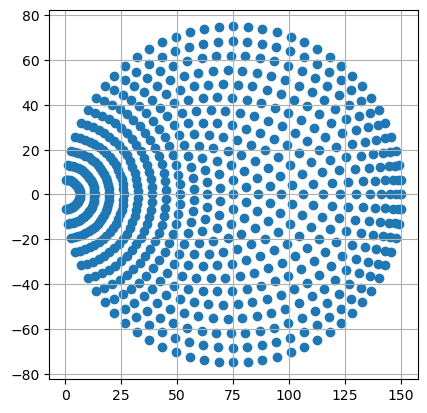

In [317]:
model = MyLink2(75, 75)

th1s = np.array(range(0, 185, 5))*np.pi/180
th1s = np.repeat(th1s.reshape(1, -1), 36, axis=0).flatten()
th2s = np.array(range(0, 185, 5))*np.pi/180
th2s = np.repeat(th2s, 36)
ths = np.stack([th1s, th2s])

ps = model.fk(ths)
ps.shape

xs, ys = ps
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect="equal")
#ax.set_ylim(0, 200)
ax.grid()
ax.scatter(xs, ys)
plt.show()

In [318]:
ths_by_ik = model.ik(ps)
ths_by_ik.shape

(666,)
(4, 2, 666)
[[[ 0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -0.00000000e+00]]

 [[ 8.72664626e-02  4.27435864e-15]
  [ 8.72664626e-02 -8.72664626e-02]
  [-4.27435864e-15  4.27435864e-15]
  [-4.27435864e-15 -8.72664626e-02]]

 [[ 1.74532925e-01  2.38697950e-15]
  [ 1.74532925e-01 -1.74532925e-01]
  [-2.38697950e-15  2.38697950e-15]
  [-2.38697950e-15 -1.74532925e-01]]

 ...

 [[-2.22044605e-16  2.96705973e+00]
  [-2.22044605e-16  2.22044605e-16]
  [-2.96705973e+00  2.96705973e+00]
  [-2.96705973e+00  2.22044605e-16]]

 [[ 8.72664626e-02  2.96705973e+00]
  [ 8.72664626e-02 -8.72664626e-02]
  [-2.96705973e+00  2.96705973e+00]
  [-2.96705973e+00 -8.72664626e-02]]

 [[-6.66133815e-16  3.05432619e+00]
  [-6.66133815e-16  6.66133815e-16]
  [-3.05432619e+00  3.05432619e+00]
  [-3.05432619e+00  6.66133815e-16]]]


(2, 666, 2)

In [319]:
ps.T

array([[150.        ,   0.        ],
       [149.71460236,   6.53668071],
       [148.86058148,  13.02361333],
       ...,
       [  1.13941852, -13.02361333],
       [  0.85402088,  -6.48693262],
       [  0.28539764,  -6.53668071]])

In [320]:
ths_by_ik

array([[[ 0.00000000e+00,  0.00000000e+00],
        [ 8.72664626e-02,  4.27435864e-15],
        [ 1.74532925e-01,  2.38697950e-15],
        ...,
        [-2.22044605e-16,  2.96705973e+00],
        [ 8.72664626e-02,  2.96705973e+00],
        [-6.66133815e-16,  3.05432619e+00]],

       [[ 0.00000000e+00,  0.00000000e+00],
        [ 8.72664626e-02,  4.27435864e-15],
        [ 1.74532925e-01,  2.38697950e-15],
        ...,
        [-2.22044605e-16,  2.96705973e+00],
        [ 8.72664626e-02,  2.96705973e+00],
        [-6.66133815e-16,  3.05432619e+00]]])

In [321]:
ths[:, ths.sum(axis=0)<=np.pi].T

array([[0.        , 0.        ],
       [0.08726646, 0.        ],
       [0.17453293, 0.        ],
       ...,
       [0.        , 2.96705973],
       [0.08726646, 2.96705973],
       [0.        , 3.05432619]])

In [322]:
ths.shape

(2, 1332)

In [323]:
ps.shape

(2, 666)

(2, 1332)
(1, 1332)


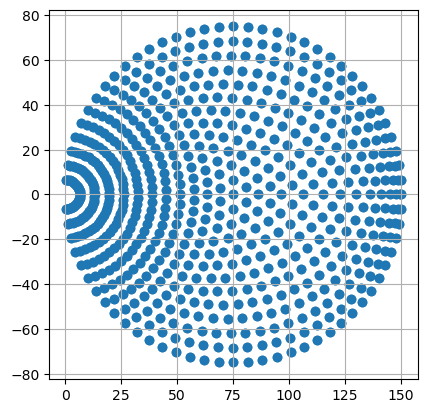

In [324]:
ps2 = model.fk(ths_by_ik.T)
ps2.shape

xs2, ys2 = ps2
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect="equal")
#ax.set_ylim(0, 200)
ax.grid()
ax.scatter(xs2, ys2)
plt.show()

In [158]:
np.arctan(np.array([1, 1])/np.array([0, 1]))

/var/folders/fv/jzwx0yvx1k70t0z5f64x63100000gn/T/ipykernel_91545/595225118.py:1: RuntimeWarning: divide by zero encountered in true_divide
  np.arctan(np.array([1, 1])/np.array([0, 1]))


array([1.57079633, 0.78539816])